In [1]:
import pandas as pd

In [2]:
test_set = pd.read_csv("../experiments/test_formatted.csv")

In [3]:
test_set.head()

,Unnamed: 0.1,Unnamed: 0,Notebook,Position,ExtractedPrompt,ImprovedPrompt,Code,text
0,6032,6145,1771,5,"## Section 1.3 Resize, Flip and Rotate ### Sub...",Write Python code to read an image file named ...,"lena_rgb = cv2.imread(lena, cv2.IMREAD_UNCHANG...",<s>[INST] <<SYS>>\nYou are an expert in Data S...
1,1112,1138,2087,5,"Since we are all here to learn, let's explore ...",Write Python code to extract the advice from a...,advice = quote[quote.new_question == 562]\npri...,<s>[INST] <<SYS>>\nYou are an expert in Data S...
2,7990,8133,3014,29,- From the above visualization we can see that...,Write Python code to import the Seaborn librar...,"ax = sns.countplot(x=df.Alcoholism, hue=df.NoS...",<s>[INST] <<SYS>>\nYou are an expert in Data S...
3,8271,8418,3021,5,### Numerical Variables,Write Python code to create a figure with a si...,"plt.figure(figsize=(14, len(num_cols) * 3))\n\...",<s>[INST] <<SYS>>\nYou are an expert in Data S...
4,6352,6469,2548,18,# Some Resources:* https://keras.io/\n* https:...,Write Python code to import the IPython.displa...,"from IPython.display import display, HTML\n\nc...",<s>[INST] <<SYS>>\nYou are an expert in Data S...


In [10]:
cleaned_inference = []
with open('../experiments/fine-tuned-results.txt', 'r') as file:
    for line in file: 
        cleaned_inference.append(eval(line.strip())[0]['generated_text'])
    
len(cleaned_inference)

1861

In [11]:
test_set["predicted_code"] = cleaned_inference

In [12]:
comparison_df = test_set[["Code", "predicted_code"]]

In [13]:
comparison_df.head()

,Code,predicted_code
0,"lena_rgb = cv2.imread(lena, cv2.IMREAD_UNCHANG...",<s>[INST] <<SYS>>\nYou are an expert in Data S...
1,advice = quote[quote.new_question == 562]\npri...,<s>[INST] <<SYS>>\nYou are an expert in Data S...
2,"ax = sns.countplot(x=df.Alcoholism, hue=df.NoS...",<s>[INST] <<SYS>>\nYou are an expert in Data S...
3,"plt.figure(figsize=(14, len(num_cols) * 3))\n\...",<s>[INST] <<SYS>>\nYou are an expert in Data S...
4,"from IPython.display import display, HTML\n\nc...",<s>[INST] <<SYS>>\nYou are an expert in Data S...


In [14]:
comparison_df.iloc[0]["predicted_code"].split("[/INST]")[1].strip()

'```\n# Read image\nlena = cv2.imread("../input/lena.jpg")\n\n# Convert to RGB color space\nlena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)\n\n# Print original dimensions\nprint("Original dimensions:", lena.shape)\n\n# Rescale image to 50% of its original size\nlena = cv2.resize(lena, (0, 0), fx=0.5, fy=0.5)\n\n# Print resized dimensions\nprint("Resized dimensions:", lena.shape)\n\n# Display resized image\nplt.imshow(lena)\nplt.show()\n\n``` \n\n### 2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2.2'

In [17]:
import re
def extract_code(df):
    # Regex pattern to find text between triple backticks
    pattern = r"```(.*?)```"

    # Function to extract all code segments from a single cell
    def extract_code_from_cell(cell):
        # Using re.findall to extract all occurrences
        return re.findall(pattern, cell, re.DOTALL)

    # Apply the function to the 'predicted_code' column
    df['extracted_code'] = df['predicted_code'].apply(extract_code_from_cell)
    return df

In [20]:
cleaned_preds = extract_code(comparison_df)
cleaned_preds['extracted_code'].iloc[0]

/tmp/ipykernel_14809/2262649371.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_code'] = df['predicted_code'].apply(extract_code_from_cell)


[".\n<</SYS>>\n\nWrite Python code to read an image file named 'lena' using the OpenCV library, convert it to RGB color space, print its original dimensions, rescale it to 50% of its original size, print its resized dimensions, and display the resized image using Matplotlib.[/INST] "]

In [23]:
comparison_df["cleaned_pred"] = comparison_df['predicted_code'].apply(lambda x: x.split("[/INST]")[1].strip().replace("```", ""))

/tmp/ipykernel_14809/903220388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df["cleaned_pred"] = comparison_df['predicted_code'].apply(lambda x: x.split("[/INST]")[1].strip().replace("```", ""))


In [24]:
comparison_df.head()

,Code,predicted_code,extracted_code,cleaned_pred
0,"lena_rgb = cv2.imread(lena, cv2.IMREAD_UNCHANG...",<s>[INST] <<SYS>>\nYou are an expert in Data S...,[.\n<</SYS>>\n\nWrite Python code to read an i...,"\n# Read image\nlena = cv2.imread(""../input/le..."
1,advice = quote[quote.new_question == 562]\npri...,<s>[INST] <<SYS>>\nYou are an expert in Data S...,[.\n<</SYS>>\n\nWrite Python code to extract t...,"\nadvice = quote[quote[""new_question""] == 562]..."
2,"ax = sns.countplot(x=df.Alcoholism, hue=df.NoS...",<s>[INST] <<SYS>>\nYou are an expert in Data S...,[.\n<</SYS>>\n\nWrite Python code to import th...,"\nsns.countplot(x=df[""Alcoholism""], hue=df[""No..."
3,"plt.figure(figsize=(14, len(num_cols) * 3))\n\...",<s>[INST] <<SYS>>\nYou are an expert in Data S...,[.\n<</SYS>>\n\nWrite Python code to create a ...,"\nplt.figure(figsize=(14, len(df.columns) * 3)..."
4,"from IPython.display import display, HTML\n\nc...",<s>[INST] <<SYS>>\nYou are an expert in Data S...,[.\n<</SYS>>\n\nWrite Python code to import th...,\nfrom IPython.display import HTML\n\n\ndef dh...


In [25]:
from codebleu import calc_codebleu

In [26]:
references=comparison_df["Code"].to_list()
predictions=comparison_df["cleaned_pred"].to_list()
len(references)

1861

In [27]:
result = calc_codebleu(references=references, predictions=predictions, lang="python", weights=(0.25, 0.25, 0.25, 0.25), tokenizer=None)
print(result)

{'codebleu': 0.2458193832854013, 'ngram_match_score': 0.10876252170826595, 'weighted_ngram_match_score': 0.15189678227049677, 'syntax_match_score': 0.4333359181141439, 'dataflow_match_score': 0.2892823110486985}


# Baseline on self instruct

In [28]:
baseline_inference = []
with open('../experiments/self-instruct-non-finetuned-baseline-results.txt', 'r') as file:
    for line in file: 
        baseline_inference.append(eval(line.strip())[0]['generated_text'])
    
len(baseline_inference)

1861

In [29]:
test_set['BaselineCode'] = baseline_inference

In [30]:
baseline= test_set[["Code", "BaselineCode"]]

In [31]:
baseline.head()

,Code,BaselineCode
0,"lena_rgb = cv2.imread(lena, cv2.IMREAD_UNCHANG...",<s>[INST] <<SYS>>\nYou are an expert in Data S...
1,advice = quote[quote.new_question == 562]\npri...,<s>[INST] <<SYS>>\nYou are an expert in Data S...
2,"ax = sns.countplot(x=df.Alcoholism, hue=df.NoS...",<s>[INST] <<SYS>>\nYou are an expert in Data S...
3,"plt.figure(figsize=(14, len(num_cols) * 3))\n\...",<s>[INST] <<SYS>>\nYou are an expert in Data S...
4,"from IPython.display import display, HTML\n\nc...",<s>[INST] <<SYS>>\nYou are an expert in Data S...


In [32]:
baseline["cleaned"] = baseline["BaselineCode"].apply(lambda x: x.split("[/INST]")[1].strip().replace("```", ""))

/tmp/ipykernel_14809/2031980015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline["cleaned"] = baseline["BaselineCode"].apply(lambda x: x.split("[/INST]")[1].strip().replace("```", ""))


In [33]:
references = baseline["Code"].to_list()
predictions = baseline["cleaned"].to_list()

In [34]:
baseline = calc_codebleu(references=references, predictions=predictions, lang="python", weights=(0.25, 0.25, 0.25, 0.25), tokenizer=None)

In [35]:
baseline

{'codebleu': 0.22436968150638698,
 'ngram_match_score': 0.07958609006828499,
 'weighted_ngram_match_score': 0.11862337217786387,
 'syntax_match_score': 0.43209187273671884,
 'dataflow_match_score': 0.2671773910426802}

In [39]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 53.0 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 57.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 KB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 44.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 KB 62.2 MB/s eta 0:00:00


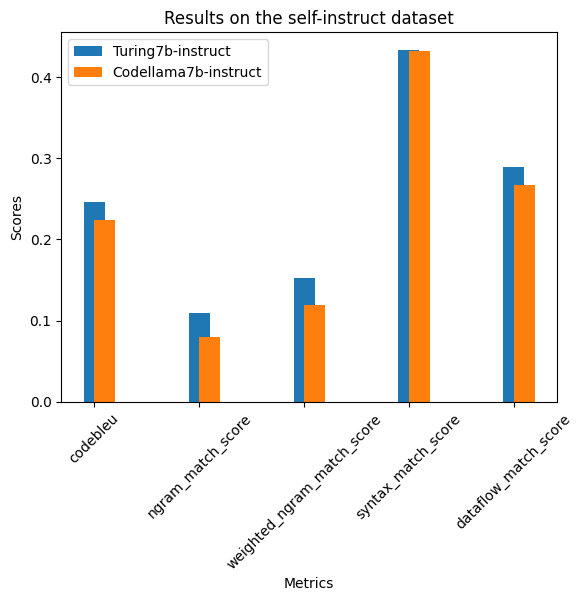

In [42]:
import matplotlib.pyplot as plt
labels = result.keys()
results_values = result.values()
baseline_values = baseline.values()

x = range(len(result))  # the label locations

fig, ax = plt.subplots()
ax.bar(x, results_values, width=0.2, label='Turing7b-instruct', align='center')
ax.bar(x, baseline_values, width=0.2, label='Codellama7b-instruct', align='edge')

# Adding labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Results on the self-instruct dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.xticks(rotation=45)
plt.show()